<a href="https://colab.research.google.com/github/jeel-coder/Synapse_LP/blob/week6/Copy_of_Synapse_LP_CV_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CV Task 1**

## **Synapse Learning Period**
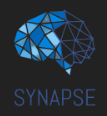

Congratulations on finishing the basic learning period! Now you will specialise in one of the most interesting domains in ML: Computer Vision. If you have been living under a rock and *still* don't know what that is, go through the below link:

https://towardsdatascience.com/everything-you-ever-wanted-to-know-about-computer-vision-heres-a-look-why-it-s-so-awesome-e8a58dfb641e

So yeah, a lot of cool stuff can be done with CV. But before we progress to doing that cool stuff, your basics need to be made very sound, which is what completing this task will do for you.

## mounting drive and importing stuff

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import math
%matplotlib inline

## opencv basics

Before we get into this, what even is an image? Get your basics cleared from below:

https://www.analyticsvidhya.com/blog/2021/03/grayscale-and-rgb-format-for-storing-images/

To actually preprocess an image, lets use the wget command to actually import one first.

 * wget is a linux command that helps us download content from the web.
 * we can use the -O flag to store it using a custom name.
 * all linux commands can be accessed in jupyter notebooks using ! before the command.

In [6]:
!wget -O pika.jpg https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png

--2024-10-13 12:15:29--  https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53612 (52K) [image/png]
Saving to: ‘pika.jpg’

pika.jpg            100%[===================>]  52.36K  --.-KB/s    in 0.04s   

2024-10-13 12:15:29 (1.15 MB/s) - ‘pika.jpg’ saved [53612/53612]



In [7]:
# linux command to see files in current directory.
!ls

gdrive	pika.jpg  sample_data


We read the image using cv.imread().
Then we use plt.imshow() to show the image.

(Why not cv.imshow(), you may ask? For that, refer to the below link:

https://stackoverflow.com/questions/55288657/image-is-not-displaying-in-google-colab-while-using-imshow)

OpenCV loads images in BGR format, while Matplotlib expects RGB.

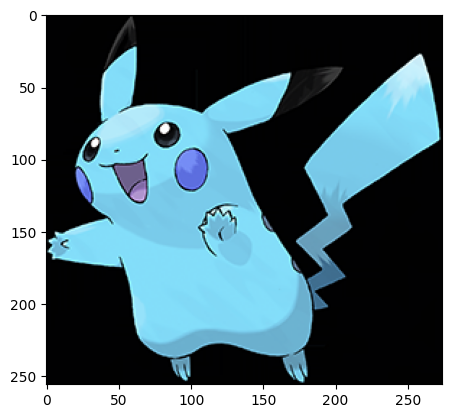

In [8]:
image = cv.imread("pika.jpg")#plotted image using matplotlib
#plt.axis('off')## Turn off the axis
plt.imshow(image)

If the shape is (height, width, 3), it is an RGB image.
If the shape is (height, width, 4), it is an RGBA image (with an alpha channel for transparency).
If the shape is (height, width), it's a grayscale image.

Why is Pikachu looking like it is doing some very weird Smurf cosplay? Google it and try to find out the reason. Then fix it in the below code cell.

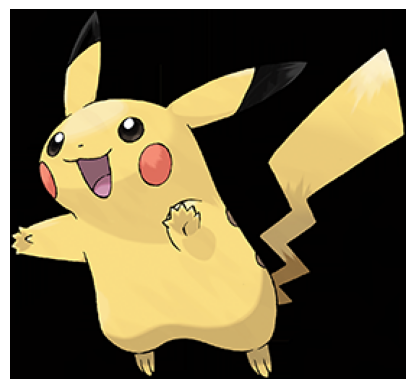

In [9]:
# output should look like the one shown below.
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Turn off the axis and display the image
plt.axis('off')
plt.imshow(image_rgb)
plt.show()

Google the one line code to convert image to grayscale in OpenCV and convert the downloaded image to grayscale. Plot the image using plt.imshow(). Remember to set the color map to "gray" (cmap = "gray") in plt.imshow() as plt automatically adds a color filter which is not needed.

Why not cv.COLOR_RGB2GRAY?

OpenCV’s default is to load images in the BGR order. So, if you use cv.imread(), the image will be in BGR format. That’s why cv.COLOR_BGR2GRAY is used for conversion.

why we used bgr and why we didn,t use rgb

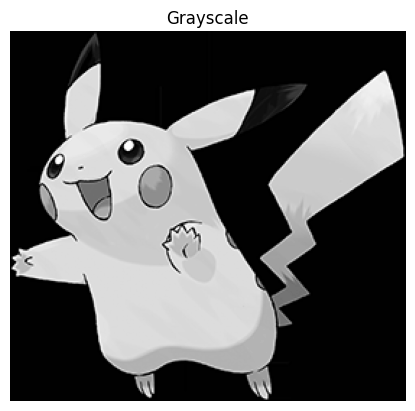

In [10]:
# convert RGB image to grayscale.
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.imshow( gray_image, cmap="gray")
plt.axis('off')  # To turn off the axis
plt.title("Grayscale")
plt.show()


Use cv2.resize() to resize your image to (200, 200) and then show it using plt.

doubt why the resized_image is not giving gray scale image

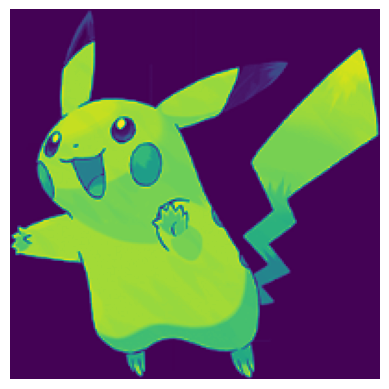

In [11]:
# resize image here.
resized_image = cv.resize(gray_image, (200, 200))
plt.imshow(resized_image)
plt.axis('off')
plt.show()

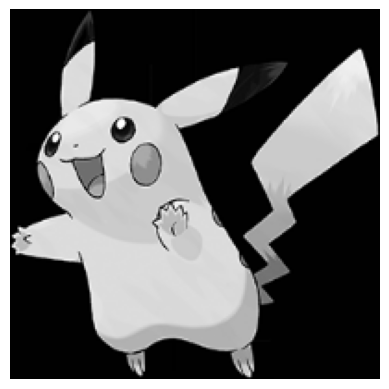

In [12]:
resized_image = cv.resize(gray_image, (200, 200))
resized_image_rgb = cv.cvtColor(resized_image, cv.COLOR_GRAY2RGB)
plt.imshow(resized_image_rgb)
plt.axis('off')
plt.show()

In [13]:
resized_image.shape

(200, 200)

In [14]:
# the resized image now has shape (200, 200, 3).# 200,200 is height(rows) and width(columns) and 3 is no.of colours
print(resized_image_rgb.shape)


(200, 200, 3)


Write code for cropping the image from height 70 to 150 and width 50 to 120. Hint: be smart with your slicing while displaying the image.

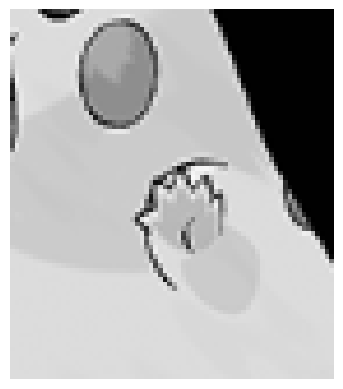

In [15]:
# crop image here. desired output is as shown below.
cropped_image = resized_image[70:150, 50:120]#you are selecting a portion of the image starting at pixel row 70 and ending at pixel row 150.
cropped_image_rgb = cv.cvtColor(cropped_image, cv.COLOR_BGR2RGB)
plt.imshow(cropped_image_rgb)
plt.axis('off')  # Turn off the axis
plt.show()

The most commonly used color spaces are RGB (red, green, blue), BGR (blue, green, red), HSV (hue, saturation, value), and grayscale. What is the cv2.cvtcolor() method? The cv2.cvtcolor() method in OpenCV is a function used for converting the color space of an image.

we caanot use cvt color to change gray scale img to hsv as it requires colours and gray has only one colour.and matplotlib explaects img to be in rgb so convert it back to rgb before using imshow()

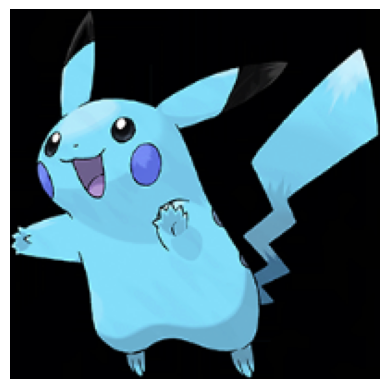

In [16]:
hsv_image = cv.resize(image_rgb, (200, 200))
resized_image_hsv = cv.cvtColor(hsv_image, cv.COLOR_BGR2HSV)
resized_image_rgb_from_hsv = cv.cvtColor(resized_image_hsv, cv.COLOR_HSV2RGB)
plt.imshow(resized_image_rgb_from_hsv)
plt.axis('off')
plt.show()

We can also draw lines on images with OpenCV. Lets make our Pikachu buff with some abs.

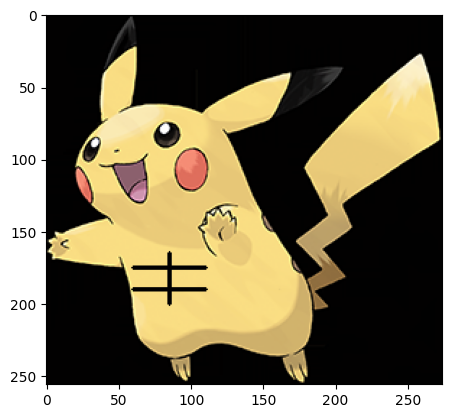

In [17]:
# horizontal lines.
buff_pikachu = cv.line(image.copy(), (60, 175), (110, 175), (0, 0, 0), 2)# here x changes from 65 to 110 and y is const so horizonatl line and 000 is colour and 2 is thickness
buff_pikachu = cv.line(buff_pikachu, (60, 190), (110, 190), (0, 0, 0), 2)
# vertical line.
buff_pikachu = cv.line(buff_pikachu, (85, 200), (85, 165), (0, 0, 0), 2)
# i kept the axis for better understanding.
plt.imshow(cv.cvtColor(buff_pikachu, cv.COLOR_BGR2RGB))

Draw random (sfw) stuff on pikachu. Any shape, any figure is allowed. Resource:
https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html

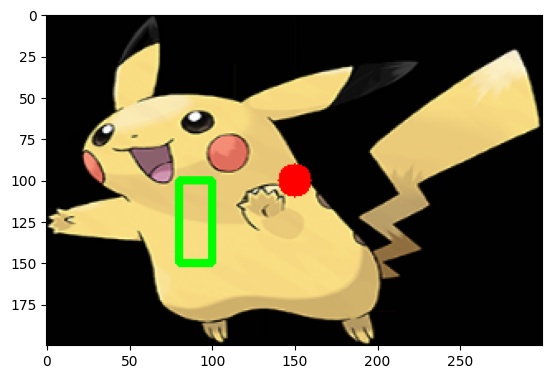

In [18]:
pika=cv.resize(image, (300, 200))
pika=cv.rectangle(pika,(80,100),(100,150),(0,255,0),3)
pika=cv.circle(pika,(150,100), 10, (0,0,255), -1)
plt.imshow(cv.cvtColor(pika, cv.COLOR_BGR2RGB))

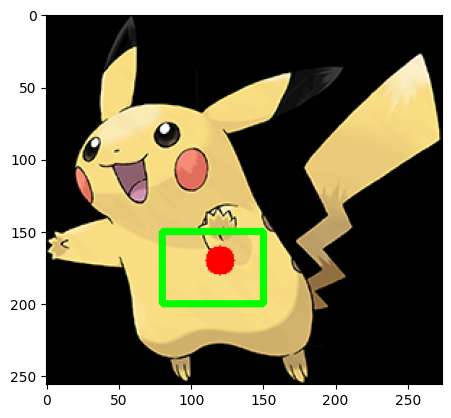

In [19]:
# playground.
img=cv.rectangle(image.copy(),(80,150),(150,200),(0,255,0),3)
img=cv.circle(img,(120,170), 10, (0,0,255), -1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## convolution

Convolution flips the kernel before sliding it across the image, which makes it better suited for filtering operations (like edge detection or smoothing).

in convolution we flip the kernel but in cross correlation we do not flip the kernel.After calculating the cross-correlation at all valid positions, you’ll obtain a correlation map.

In template matching, the goal is to find the highest correlation value, which shows where the template is most similar to the image. This technique is used in various applications, like object detection in images, pattern recognition, and feature matching in computer vision.

Before we do move ahead, we feel it important that you clearly understand what convolution is. A lot of stuff in preprocessing and in edge detection also involves convolving images.

Y'all must have studied the formula for convolution of two functions somewhere in your Engineering Maths III portion. If not, this is what the formula for it looks like:

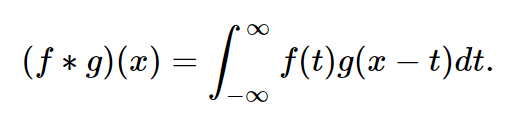

Yeah, they must have skipped over the part about how it is actually useful and just made you do a million integrals for it. To get a feel for what it exactly is, go through the resource below:

https://youtu.be/KuXjwB4LzSA?si=wc7iLGuUYEOw8TwA

As you may now know, it has use cases all over mathematics. But from an image processing point of view, this below GIF is essentially what it looks like:

<img src='https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif' alt='how to  a gif to your page' height='350px'>

For a clearer explanation, see the below video:

https://youtu.be/Etksi-F5ug8?si=pXAvAQJtPKa0s19v

All that should have made your concepts extremely clear. If not, go through the resources again.

negative red and positive blue

edge detection algorithm to an image may significantly reduce the amount of data to be processed and may therefore filter out information that may be regarded as less relevant, while preserving the important structural properties of an image.

In [20]:
np.convolve((1,2,3),(4,5,6))

array([ 4, 13, 28, 27, 18])

Noise in an image refers to unwanted variations in pixel values that do not correspond to actual changes in the scene. Noise can arise from various factors like sensor imperfections, environmental conditions, or compression artifacts. Reducing noise is important because it can create false edges (edges that aren't real features) and affect the clarity of true edges.

Fragmentation occurs when true edges are not continuous, leading to broken, disconnected edges.

filters:

why to do filtering?
as while finding edges we face problems like noise, fragmentation.


Canny Edge Detector:
uses Gaussian filtering to smooth the image and also applies hysteresis (we create two thresholds:a high threshold to detect strong edges and a low threshold for weaker edges)thresholding to maintain edge continuity.

Sobel and Prewitt Filters:gradient-based methods ,effective in detecting edges by emphasizing regions with high intensity gradients

Active Contours (Snakes): These techniques use curves that evolve iteratively to fit object boundaries, offering a way to connect fragmented edges and fill in gaps.

Edge Linking: Post-processing techniques can be applied to reconnect fragmented edges based on proximity and orientation.

Time to get your hands dirty now. As you may have realised, we first flip the kernel before convolving the image. So, write a function for flipping a two dimensional matrix horizontally from scratch. Try do an in-place flip to improve space complexity.

Sobel: Use when you want smooth, thick edges and can tolerate a little more computation. Good noise resistance.

Prewitt: Use when you need slightly faster computation and can tolerate some extra noise.

Roberts: Use for sharp, fine edges and very efficient computation, but only in low-noise situations.

Canny (not a kernel, but a full method): Use for the most accurate edge detection with noise resistance, but it's slower.

Laplacian of Gaussian (LoG): Use when detecting fine details in complex textures and handling overlapping edges.

The **image gradient** is a fundamental concept in image processing that represents the change in intensity (brightness) between neighboring pixels. It is used to detect edges, where rapid changes in intensity occur. The gradient is typically calculated by taking the derivative of the pixel values, and it provides both the magnitude (how strong the change is) and direction (the direction in which the change occurs).

In [44]:
def flip(kernel):

    for i in range(len(kernel)):
        arr = kernel[i]
        l = len(arr)

        for j in range(l // 2):
            temp = arr[j]
            arr[j] = arr[l - j - 1]
            arr[l - j - 1] = temp

    return kernel


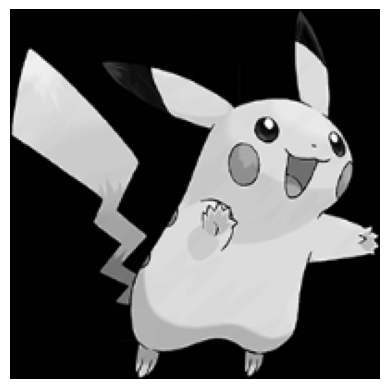

In [45]:
# run this cell as it is to check the output.
plt.axis('off')
# using a copy as the function does the flipping in-place.
plt.imshow(flip(resized_image.copy()), cmap = "gray")

Now, write a function to perform basic convolution. Assume that the image is grayscale so there is only one channel instead of the usual RBG channels. Note that kernels will always be a square matrix while an image can be of any shape.

Hint: Use slicing instead of for loops while performing addition operations.

In [62]:
import numpy as np

def convolution(kernel, image):
    kernel = flip(kernel)


    img_h, img_w = image.shape#200
    kernel_h, kernel_w = kernel.shape#7


    output_h = img_h - kernel_h + 1#194
    output_w = img_w - kernel_w + 1
    image_conv = np.zeros((output_h, output_w))
    img = np.zeros((kernel_h, kernel_w))
    l=0
    k=0
    for i in range(output_h):
        for j in range(output_w):
          sum=0
          img = image[i:i+kernel_h, j:j+kernel_w]
          sum+=img[l][k]*kernel[l][k]
          k+=1
          image_conv[l][k]=sum
        l+=1
    return image_conv




In [63]:
# run this cell as it is to check the output.
kernel = np.array([
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 49, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1]
]) # 7 x 7 kernel to sharpen images.
#plt.axis('off')
plt.imshow(convolution(kernel, resized_image), cmap = 'gray')

IndexError: index 7 is out of bounds for axis 0 with size 7

Here, you can see that we lose the border pixels (notice that pikachu's toes and fingers have been nibbled at by our kernel).

In [25]:
# shape is changed after convolution.
print("Shape before convolution =", resized_image.shape)
print("Shape after convolution =", convolution(kernel, resized_image).shape)

Shape before convolution = (200, 200)
Shape after convolution = (194, 194)


What if we want to ensure the output image is the same size as that of the input image? There we use something called padding. Resource:

https://youtu.be/PGBop7Ka9AU?si=zWKktXnDL1bN_iCE

Also, there is something called "stride" in convolution as well. Resource:

https://youtu.be/lxk_nmpqI5M?si=SCnShMXeGLRyDsBj

Implement a convolution function with stride in parameters. Use zero padding to pad the images.

In [28]:
import numpy as np

def convolution_with_stride(kernel, image, stride, padding=0):

    kernel = np.flip(kernel)

    img_h, img_w = image.shape
    kernel_h, kernel_w = kernel.shape


    output_h = ((img_h + 2 * padding - kernel_h) // stride) + 1
    output_w = ((img_w + 2 * padding - kernel_w) // stride) + 1


    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')


    image_stride = np.zeros((output_h, output_w))

    for i in range(0, output_h):
        for j in range(0, output_w):
            sum = 0
            for m in range(kernel_h):
                for n in range(kernel_w):
                    sum += kernel[m][n] * image[i * stride + m][j * stride + n]
            image_stride[i][j] = sum

    return image_stride




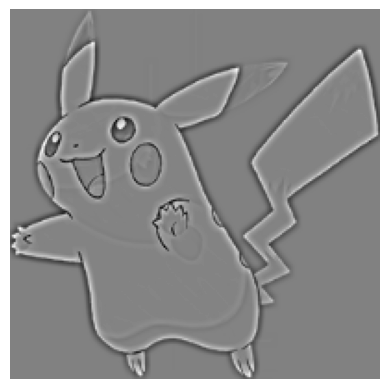

In [29]:
# run this cell as it is to check the output.
plt.axis('off')
plt.imshow(convolution_with_stride(kernel, resized_image, 1,3), cmap = 'gray')

In [36]:
import numpy as np

def convolution_with_stride(kernel, image, stride):

    kernel = np.flip(kernel)

    img_h, img_w = image.shape
    kernel_h, kernel_w = kernel.shape
    output_h = ((img_h - kernel_h) // stride) + 1
    output_w = ((img_w - kernel_w) // stride) + 1

    image_stride = np.zeros((output_h, output_w))

    for i in range(output_h):
        for j in range(output_w):
            sum = 0
            for m in range(kernel_h):
                for n in range(kernel_w):
                    sum += kernel[m][n] * image[i * stride + m][j * stride + n]
            image_stride[i][j] = sum

    return image_stride


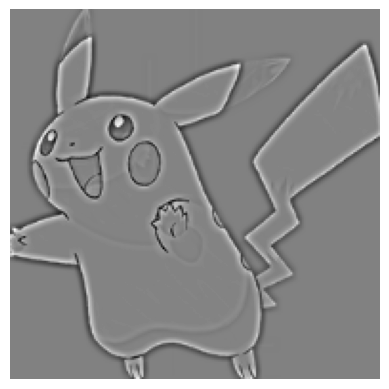

In [38]:
plt.axis('off')
plt.imshow(convolution_with_stride(kernel, resized_image, 1), cmap = 'gray')

This maintains both the original shape of the image as well as Pikachu's toes and fingers.

In [39]:
# shape should now be the same.
print("Shape before convolution =", resized_image.shape)
print("Shape after convolution =", convolution_with_stride(kernel, resized_image, 1).shape)

Shape before convolution = (200, 200)
Shape after convolution = (194, 194)


Play around with the stride parameter to see how it affects the convolution operation and its shape.

In [ ]:
# playground.

In the last task, we saw that we could do all of the above with Tensorflow. So why did we make you do all this? Because the underlined parameters in the below image of Conv2D layer's parameters will now make much more sense.

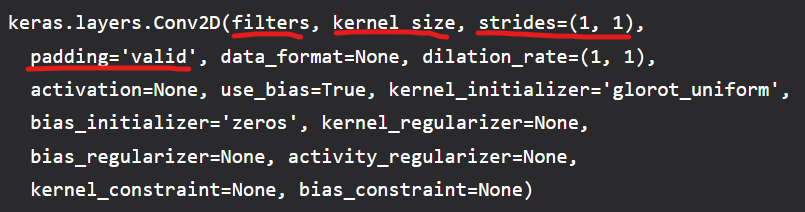

Apart from clearing your convolution concepts, it also hopefully made y'all realise the importance of DSA and how much thought goes into each inbuilt function that we usually directly import and apply. It is basic stuff like this that is sometimes modified into LeetCode problems. Examples:

https://leetcode.com/problems/flipping-an-image/

https://leetcode.com/problems/rotate-image/

## preprocessing images

That was a lot of brouhaha over convolution. Hopefully your functions are correct (test them out before starting this part!), as they are now going to be used for image preprocessing.

Just like we would preprocess DataFrames before actually doing any ML with them in the previous tasks, images need to be preprocessed first before applying algorithms on them as well. Resource:

https://www.analyticsvidhya.com/blog/2023/03/getting-started-with-image-processing-using-opencv/

A lot of preprocessing is just using special kernels to convolve over an image to yield certain output. The below images shows some staple kernel and their usecases.

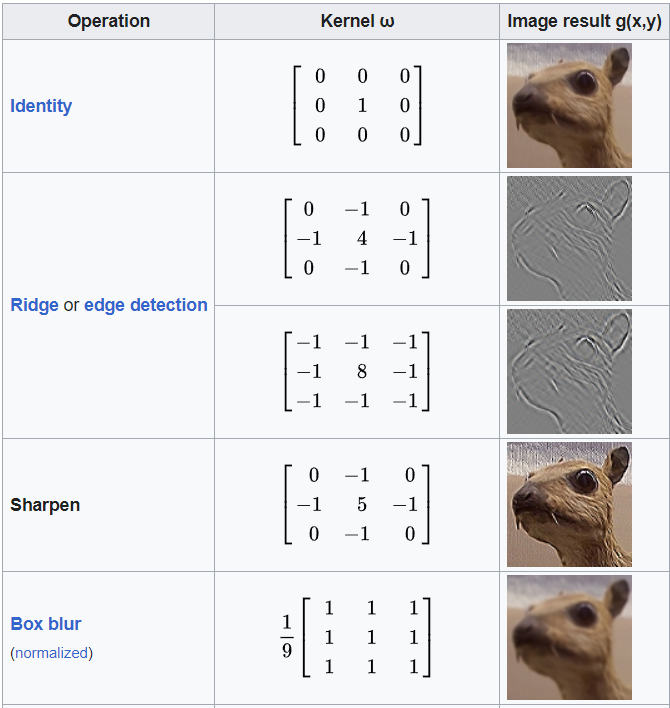
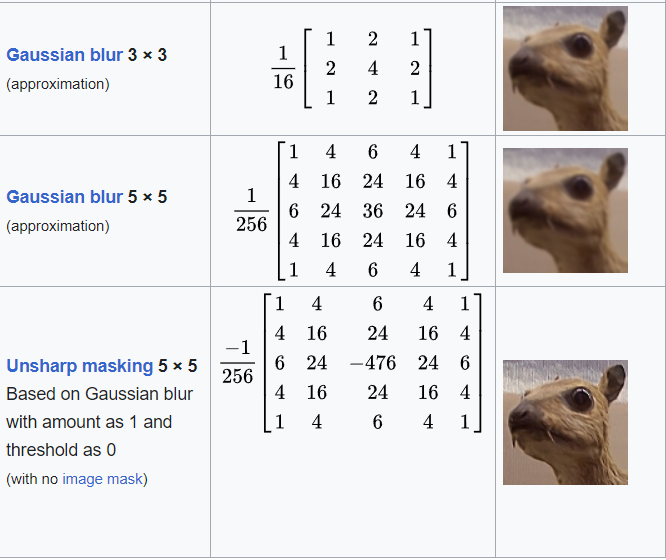

The earlier kernel we applied to test our convolution functions is called a sharpening filter, used used to accentuate the edges of the image and add contrast to them.

# Blurring

Blurring is used to reduce noise in the image. The most common type is Gaussian Blur. Resource:

https://youtu.be/C_zFhWdM4ic?si=RPWKZi6MvS7SX32v

Let us apply Gaussian Blur on our given Pikachu image. The earlier convolution functions you've written will be quite handy now.

In [ ]:
# run this cell as it is.
gb_kernel = np.array([
    [0.000798, 0.006581, 0.013347, 0.018614, 0.013347, 0.006581, 0.000798],
    [0.006581, 0.054223, 0.109394, 0.152377, 0.109394, 0.054223, 0.006581],
    [0.013347, 0.109394, 0.221008, 0.307116, 0.221008, 0.109394, 0.013347],
    [0.018614, 0.152377, 0.307116, 0.427661, 0.307116, 0.152377, 0.018614],
    [0.013347, 0.109394, 0.221008, 0.307116, 0.221008, 0.109394, 0.013347],
    [0.006581, 0.054223, 0.109394, 0.152377, 0.109394, 0.054223, 0.006581],
    [0.000798, 0.006581, 0.013347, 0.018614, 0.013347, 0.006581, 0.000798]
]) # 7 x 7 kernel for Guassian Blur.
plt.axis('off')
plt.imshow(convolution_with_stride(gb_kernel, gray, 1), cmap = 'gray')

Obviously, in practice we use inbuilt functions for all this. Look into the official docs for the various types of blurs and their implementations:

https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

Apply Median Blur using OpenCV functions.

In [ ]:
# apply Median Blur.

Apply Bilateral Filtering and show the output.

In [ ]:
# apply Bilateral Filtering.

##Hough Transform and Edge Detection

Download the image in the given drive link. Save it in your own drive.

https://drive.google.com/file/d/1u3Mqsj-tltJLAQeljHDpK_PX0n3AgoNa/view?usp=sharing

Our task is to find all the vertical edges in it.

Some specific steps need to be followed for this, and each step's code reference is easily found online by simple Google searches. So, only theory resources are given for this section, none for implementation.

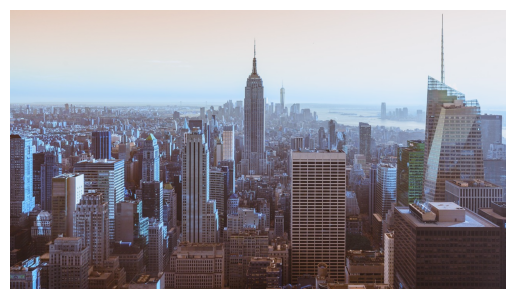

In [ ]:
# read the image and display it.

Step 1: Convert image to grayscale.

(Note: We usually convert to black and white, but here that would mean loss of vertical edges in the image as they are themselves black. Hence, we don't do that in this case.)

In [ ]:
# convert to grayscale and display the image

Step 2: Apply Gaussian Blur with OpenCV functions.

In [ ]:
# apply Gaussian Blur and show image.

Step 3: Apply Canny Edge detection. Resources:

https://youtu.be/uihBwtPIBxM?si=dzspcgGtKxSAsgV7

https://youtu.be/sRFM5IEqR2w?si=0775wZiBu9uN6lEX

In [ ]:
# apply canny edge detection and show image.

Step 4: Now, we use the HoughLinesP (probabilistic hough transform) for actual vertical line detection. Resources:

https://youtu.be/4zHbI-fFIlI?si=RkV_z7FE6iLKYLQV

https://www.analyticsvidhya.com/blog/2022/06/a-complete-guide-on-hough-transform/

In [ ]:
# detect vertical lines. feel free to add and remove parameters as you deem appropriate.
lines = cv.HoughLinesP(image = , # insert image.
                       rho = , # insert appropriate value.
                       theta = , # insert appropriate value.
                       threshold = , # insert appropriate value.
                       minLineLength = , # insert appropriate value.
                       maxLineGap = ) # insert appropriate value.

# initialize an empty 1-D list to store vertical line coordinates.
coordinates =

# collect coordinates of detected vertical lines.
for line in lines:
    x1, y1, x2, y2 = # insert appropriate variable.
    angle = np.arctan2() * 180 / np.pi # insert appropriate variable(s).

    # Filter out vertical lines.
    if abs(angle) == : # insert appropriate value for angle.
        coordinates.append((x1, y1, x2, y2))
        # Draw the line on the original image
        cv.line()

for x1, y1, x2, y2 in coordinates:
  print(f"Vertical Line: ({x1}, {y1}) - ({x2}, {y2})")

Let us see our final results on our original image.

In [ ]:
# display the final resultss

Play around with the above code snippets in new cells to obtain even better results for detecting vertical edges.

In [ ]:
# playground.

# Morphological Transformations

references : https://www.youtube.com/watch?v=xSzsD4kXhRw&t=960s, https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html


Steps in the code:
*   Load the image
*   Convert to grayscale
*   Apply thresholding to convert the image to binary (black and white)
*   Apply morphological operations like erosion, dilation, opening, and closing





Why do you think it's necessary to perform morphological transformations?

Answer here:

Download image: https://drive.google.com/file/d/1j6IPAheD146pqW-GZ_gGgaCVgUnEWC0z/view?usp=sharing

In [ ]:
# Load and display the image

In [ ]:
# Convert to grayscale

In [ ]:
# apply thresholding
_, binary_img = cv.threshold(gray_img, 150, 255, cv.THRESH_BINARY_INV)

In [ ]:
 # Define a kernel (5x5 kernel)
kernel = np.ones((5, 5), np.uint8)

In [ ]:
# test out the morphological transformations

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of thresholding in image processing and what are the different kinds of thresholding.

The best research will be edited and featured on the Synapse Instagram and LinkedIn page. Happy coding! :)

# **End of Task**

> ©Synapse 2024 - 2025

